# Decision Trees Lab

## Objectives
- Train classification and regression trees
- Visualize trees
- Explore overfitting
- Interpret feature importance


## Part 1: Decision Tree for Classification (Iris Dataset)

In [1]:
from sklearn.datasets import load_iris
# from scikit-learn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
fig_width = 10
fig_height = 6

In [3]:
# load data
X, y = load_iris(return_X_y=True)

Accuracy: 1.0


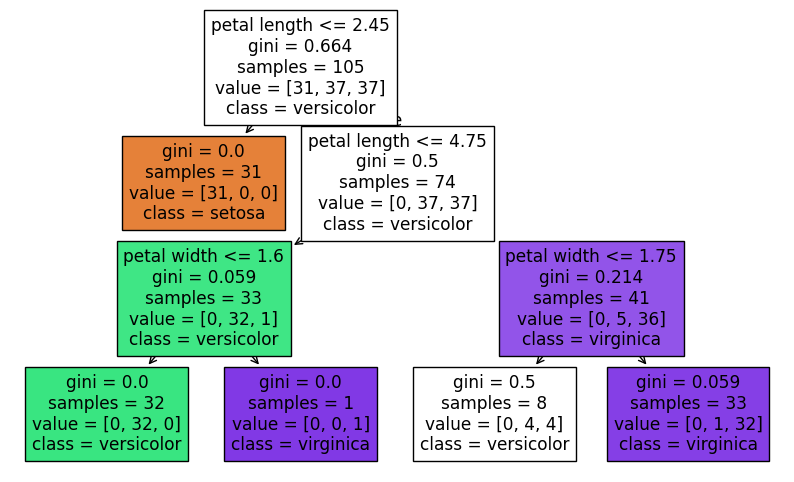

In [27]:
# split the iris data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# train-test split
decision_tree_object = DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree_object.fit(X_train, y_train)

# predict
y_pred = decision_tree_object.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# plot tree
plt.figure(figsize=(fig_width, fig_height))
plot_tree(decision_tree_object, \
          feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'], \
          class_names=['setosa', 'versicolor', 'virginica'], filled=True)
plt.show()

In [28]:
Y_pred = decision_tree_object.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


Feature importance: In decision trees, feature importance is typically calculated based on the total reduction in the criterion (like Gini impurity or entropy) that a feature provides across all splits in the tree. This is often referred to as "Gini importance" or Mean Decrease in Impurity (MDI).

In [17]:
importances = decision_tree_object.feature_importances_
print(importances)

[0.         0.         0.92510833 0.07489167]


## Part 4: Decision Tree for Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# Generate a random regression problem
X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)

fig, ax = plt.subplots(figsize=(fig_width, fig_height))
ax.scatter(X, y)
ax.set_xlabel('X')
ax.set_ylabel('y')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# training
regression_object = DecisionTreeRegressor(max_depth=3, random_state=42)
regression_object.fit(X_train, y_train)

# plot the tree
plt.figure(figsize=(fig_width, fig_height))
plot_tree(regression_object, filled=True, rounded=True, precision=2)

In [18]:
# prediction
y_pred = regression_object.predict(X_test)

fig, ax = plt.subplots(figsize=(fig_width, fig_height))
ax.scatter(X_train, y_train, color='red', label='given')
ax.scatter(X_test, y_pred, color='green', label='predicted')
ax.legend()
ax.set_xlabel('X')
ax.set_ylabel('y')

ValueError: X has 4 features, but DecisionTreeRegressor is expecting 1 features as input.

## Part 2: Overfitting Experiment

## Part 3: Feature Importance

In [ ]:
depths = range(1, 11)
train_acc = []
test_acc = []

for d in depths:
    c = DecisionTreeClassifier(max_depth=d, random_state=42)
    c.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, c.predict(X_train)))
    test_acc.append(accuracy_score(y_test, c.predict(X_test)))

plt.plot(depths, train_acc, label="Train")
plt.plot(depths, test_acc, label="Test")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Measure the accuracy of regression using the Mean Squared Error (MSE).

$$
MSE = \frac{1}{n}\sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

In [ ]:
print("MSE:", mean_squared_error(y_test, y_pred))

## Exercises
1. Change max_depth and observe results.
2. Try criterion='entropy'.
3. Train a regression tree using make_regression.
